# Sheet 2 - Practical Exercise

In these exercises we will work with data randomly generated by ourselves. Importing an external dataset will not be necessary.

In [1]:
#add code to import your preferred visualization package

import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt

## Exercise 1
Use Numpy to create two sets of 1000 Datapoints. Both should be following a normal distribution, one around an expected value of 5 with a standard deviation of 1.5, the other around an expected value of 12 with a standard deviation of 3.  

Plot both sets in one histogram.

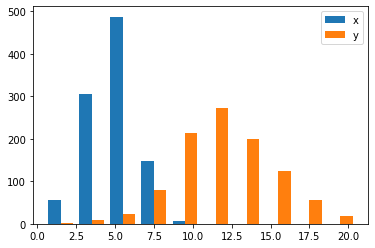

In [2]:
#Add code to create both datasets

#Add code to plot both in a histogram

x = np.random.normal(5, 1.5, 1000)
y = np.random.normal(12, 3, 1000)



plt.hist([x, y], label=['x', 'y'])
plt.legend(loc='upper right')
plt.show()



Create a third set of Datapoints containing the points of both of the previous sets. Plot this Dataset as a histogram as well.

array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

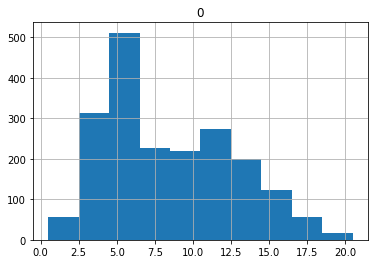

In [3]:
#Add code to combine the two existing datasets

#Add code to plot the result as a histogramm
df1 = pd.DataFrame(x)
df2 = pd.DataFrame(y)
frames = [df1, df2]
df3 = pd.concat(frames)
df3.hist()

You should see a histogram with two "humps". However the second hump should be significantly smaller than it was when plotting the datasets separately. Why is that the case?

## Exercise 2
Create a function that calculates the mean and standard deviation of datasets and uses those values to calculate the `SelfExp` for each value of the given dataset. Use this function to calculate the `SelfExp` for each value of each of the three datasets.  
Next create a scatterplot with the selfexp value as the y-axis, and the actual randomly generated value on the x-axis

In [4]:
def selfExp(values):
    #Add code for calculating mean and standard deviation
    
    #Add code for calculating the selfexp values
  n = len(values)
  mean = sum(values) / n
  deviations = [(x - mean) ** 2 for x in values]
  variance = sum(deviations) / n
  std_dev = math.sqrt(variance)
  SelfExp = [abs(y - mean)/std_dev for y in values]

  return SelfExp

x_selfexp = selfExp(x)
y_selfexp = selfExp(y)
z_selfexp = selfExp(df3.values)

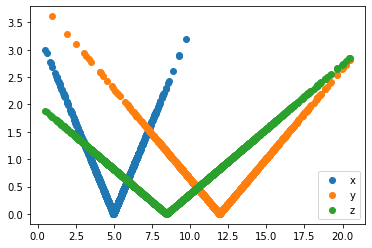

In [5]:
#Add code to create a scatterplot
plt.scatter(x, x_selfexp, label="x")
plt.scatter(y, y_selfexp , label="y")
plt.scatter(df3.values, z_selfexp, label="z")
plt.legend(loc='lower right')

plt.show()





In [6]:
df1.insert(1,"SelfExp",selfExp(df1.values), True)
df2.insert(1,"SelfExp",selfExp(df2.values), True)
df3.insert(1,"SelfExp",selfExp(df3.values), True)

The resulting plot does not necessarily grant us new insight into the properties of our dataset. It should however give us a nice visualization and hopefully some understanding of what the selfexp actually is.

Now consider a threshold value $\tau = 2.5$, representing a probability of $99\%$ (compare slide 32 of the lecture).
For each of our three datasets, create a new dataset only containing the values with a SelfExp $s>\tau$.

In [7]:
#Add code to filter the datasets
#data_subset1=df1[(selfExp(df1.values)>2.5)]

df_new_1 = df1[df1.SelfExp > 2.5]
df_new_2 = df2[df2.SelfExp > 2.5]
df_new_3 = df3[df3.SelfExp > 2.5]

df4 = df_new_1.drop(["SelfExp"], axis = 1)
df5 = df_new_2.drop(["SelfExp"], axis = 1)
df6 = df_new_3.drop(["SelfExp"], axis = 1)

